# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

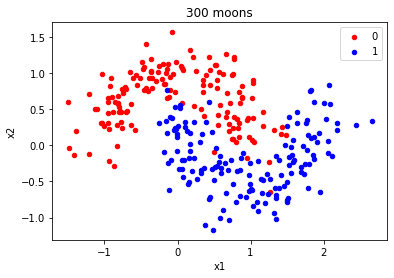

In [2]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

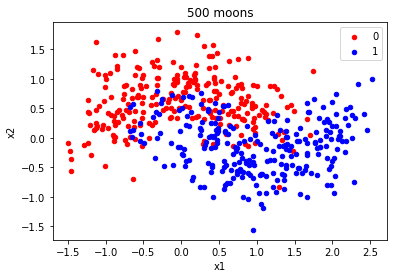

In [3]:
# YOUR CODE HERE
# Example 2

X, y = make_moons(n_samples=500, noise=0.35, random_state=0)
plot_moons(X,y)

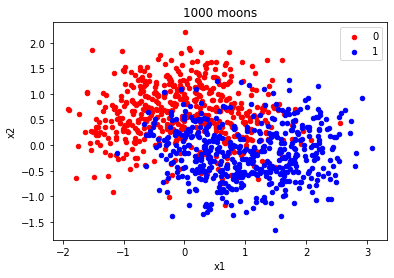

In [4]:
X, y = make_moons(n_samples=1000, noise=0.45, random_state=0)
plot_moons(X,y)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [5]:
# YOUR CODE HERE
X, y = make_moons(n_samples=250, noise=0.20, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [11]:
! pip install tensorflow 

In [12]:
# YOUR CODE HERE
from tensorflow.keras import Sequential, layers

In [15]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model = Sequential()  
    model.add(layers.Dense(5, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [16]:
# YOUR CODE HERE
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set! 

Store the results of the training into a `history` variable. ❓

In [52]:
# YOUR CODE HERE
history = model.fit(X_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4127 - accuracy: 0.8000
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8000
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8000
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4060 - accuracy: 0.8000
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8000
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8000
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8000
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.3964 - accuracy: 0.8000
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3943 - accuracy: 0.8000
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8057
Epoch 11/

11/11 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8514
Epoch 84/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.8514
Epoch 85/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.8514
Epoch 86/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.8514
Epoch 87/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2978 - accuracy: 0.8457
Epoch 88/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2978 - accuracy: 0.8514
Epoch 89/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2971 - accuracy: 0.8514
Epoch 90/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2969 - accuracy: 0.8514
Epoch 91/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2964 - accuracy: 0.8514
Epoch 92/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2962 - accuracy: 0.8514
Epoch 93/100


👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [21]:
# YOUR CODE HERE
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f31f4604e80>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.4721250832080841,
   0.4682947099208832,
   0.464580774307251,
   0.46110978722572327,
   0.4575551152229309,
   0.45413219928741455,
   0.45092087984085083,
   0.4476809799671173,
   0.44454488158226013,
   0.44132179021835327,
   0.4383445084095001,
   0.4357193112373352,
   0.43267887830734253,
   0.43011850118637085,
   0.42741093039512634,
   0.42506107687950134,
   0.4224608838558197,
   0.42006388306617737,
   0.41755664348602295,
   0.41529810428619385],
  'accuracy': [0.7371428608894348,
   0.7485714554786682,
   0.7485714554786682,
   0.7485714554786682,
   0.7485714554786682,
   0.7542856931686401,
   0.7542856931686401,
   0.7657142877578735,
   0.7657142877578735,
   0.7714285850524902,
   0.7714285850524902,
   0.7828571200370789,
   0.7828571200370789,
   0.7942857146263123,
   0.7942857146263123,
  

❓ Plot the history of the train loss using the following function ❓

In [22]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

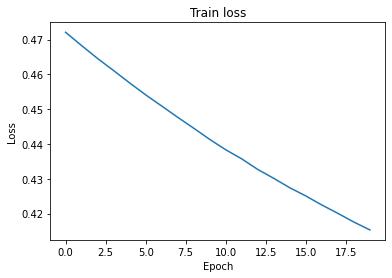

In [23]:
# YOUR CODE HERE
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [53]:
# YOUR CODE HERE
y_pred = model.predict(X_test)

❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [54]:
# YOUR CODE HERE
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.2622 - accuracy: 0.8800


**🧪 Test your code**

In [55]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_first_model.py::TestFirstModel::test_accuracy PASSED          [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master


❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [61]:
# YOUR CODE HERE
from utils.plots import *

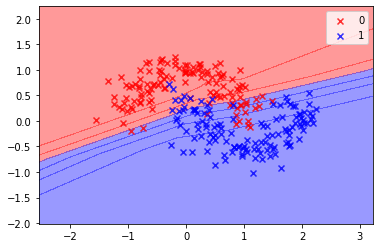

In [74]:
plot_decision_regions(X,y,classifier=model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Epoch 1/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1370 - accuracy: 0.9486
Epoch 2/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1365 - accuracy: 0.9486
Epoch 3/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1364 - accuracy: 0.9486
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1361 - accuracy: 0.9486
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9486
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1357 - accuracy: 0.9543
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1355 - accuracy: 0.9543
Epoch 8/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1355 - accuracy: 0.9543
Epoch 9/500
11/11 [==============================] - 0s 6ms/step - loss: 0.1351 - accuracy: 0.9543
Epoch 10/500
11/11 [==============================] - 0s 5ms/step - loss: 0.1348 - accuracy: 0.9543
Epoch 11/

11/11 [==============================] - 0s 3ms/step - loss: 0.1215 - accuracy: 0.9600
Epoch 84/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.9600
Epoch 85/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9600
Epoch 86/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9600
Epoch 87/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9600
Epoch 88/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9600
Epoch 89/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9600
Epoch 90/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9600
Epoch 91/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.9600
Epoch 92/500
11/11 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9600
Epoch 93/500


11/11 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.9657
Epoch 165/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9657
Epoch 166/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 0.9657
Epoch 167/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9657
Epoch 168/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9657
Epoch 169/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9657
Epoch 170/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.9714
Epoch 171/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9657
Epoch 172/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.9657
Epoch 173/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9657
Epoc

11/11 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9657
Epoch 246/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.9657
Epoch 247/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.9657
Epoch 248/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 0.9657
Epoch 249/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1018 - accuracy: 0.9657
Epoch 250/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.9600
Epoch 251/500
11/11 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 1.00 - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9657
Epoch 252/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9657
Epoch 253/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9657
Epoch 254/500
11/11 [==============================] - 0s 3ms/s

11/11 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9657
Epoch 326/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9657
Epoch 327/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9657
Epoch 328/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9657
Epoch 329/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9657
Epoch 330/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9657
Epoch 331/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9657
Epoch 332/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0957 - accuracy: 0.9657
Epoch 333/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9657
Epoch 334/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9657
Epoc

11/11 [==============================] - 0s 3ms/step - loss: 0.0912 - accuracy: 0.9657
Epoch 407/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0912 - accuracy: 0.9657
Epoch 408/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0912 - accuracy: 0.9657
Epoch 409/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9657
Epoch 410/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9657
Epoch 411/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9657
Epoch 412/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9657
Epoch 413/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9657
Epoch 414/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9657
Epoch 415/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9657
Epoc

11/11 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9657
Epoch 488/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0874 - accuracy: 0.9657
Epoch 489/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9657
Epoch 490/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9657
Epoch 491/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9657
Epoch 492/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9657
Epoch 493/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9657
Epoch 494/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9657
Epoch 495/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.9657
Epoch 496/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.9657
Epoc

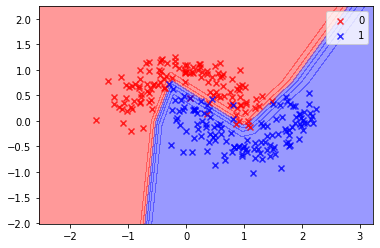

In [76]:
# YOUR CODE HERE
model.fit(X_train, y_train, batch_size=16, epochs=500)
plot_decision_regions(X,y,classifier=model)

❓ Did the test accuracy improve? ❓

In [77]:
# YOUR CODE HERE
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9600


<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [78]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = Sequential()  
    model.add(layers.Dense(20, input_dim=2, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [79]:
# YOUR CODE HERE
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

Epoch 1/500
6/6 [==============================] - 1s 3ms/step - loss: 0.6787 - accuracy: 0.7714
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.8000
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6636 - accuracy: 0.8000
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.8000
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.8057
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.8057
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6256 - accuracy: 0.8000
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6147 - accuracy: 0.8000
Epoch 9/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6023 - accuracy: 0.8114
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.8057
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.8743
Epoch 85/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.8857
Epoch 86/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.8857
Epoch 87/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2475 - accuracy: 0.8914
Epoch 88/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.8914
Epoch 89/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2452 - accuracy: 0.8971
Epoch 90/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.8971
Epoch 91/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.8914
Epoch 92/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.8971
Epoch 93/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.8971
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 4ms/step - loss: 0.0942 - accuracy: 0.9657
Epoch 168/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0939 - accuracy: 0.9657
Epoch 169/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9657
Epoch 170/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9657
Epoch 171/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0918 - accuracy: 0.9657
Epoch 172/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0913 - accuracy: 0.9657
Epoch 173/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9657
Epoch 174/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9657
Epoch 175/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 0.9657
Epoch 176/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0892 - accuracy: 0.9657
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 8ms/step - loss: 0.0697 - accuracy: 0.9657
Epoch 250/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9771
Epoch 251/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0698 - accuracy: 0.9771
Epoch 252/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9771
Epoch 253/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0693 - accuracy: 0.9771
Epoch 254/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9771
Epoch 255/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0688 - accuracy: 0.9714
Epoch 256/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0694 - accuracy: 0.9714
Epoch 257/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9771
Epoch 258/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9714
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9714
Epoch 332/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9714
Epoch 333/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9771
Epoch 334/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9771
Epoch 335/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9771
Epoch 336/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9714
Epoch 337/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9714
Epoch 338/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9714
Epoch 339/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9771
Epoch 340/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9771
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0574 - accuracy: 0.9771
Epoch 414/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0587 - accuracy: 0.9714
Epoch 415/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 0.9771
Epoch 416/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 0.9771
Epoch 417/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 0.9771
Epoch 418/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9771
Epoch 419/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.9771
Epoch 420/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0570 - accuracy: 0.9771
Epoch 421/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9771
Epoch 422/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0570 - accuracy: 0.9771
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0539 - accuracy: 0.9771
Epoch 496/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9771
Epoch 497/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.9771
Epoch 498/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9771
Epoch 499/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9771
Epoch 500/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9771


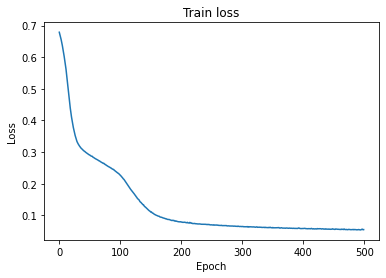

In [80]:
# YOUR CODE HERE
history2 = model.fit(X_train, y_train, batch_size=32, epochs=500)
plot_history(history2)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [83]:
# YOUR CODE HERE
accuracy_deep = model.evaluate(X_test, y_test)[1]


3/3 [==============================] - 0s 4ms/step - loss: 0.1254 - accuracy: 0.9600


🧪 **Test your code**

In [84]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_deeper_model.py::TestDeeperModel::test_accuracy PASSED        [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master


❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

In [ ]:
# YOUR CODE HERE

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!